# Discrete II Lecture 4 Assignment

### Name: Jheremy Gabriel M. Lobitaña

### ID Number: 23700004

Read about (Susanna Epp pp. 704):

- Kruskal's Algorithm
- Prim's Algorithm
- Djitraka's Shortest Path Algorithm
- Given the following graph, implement the algorithm in Python.

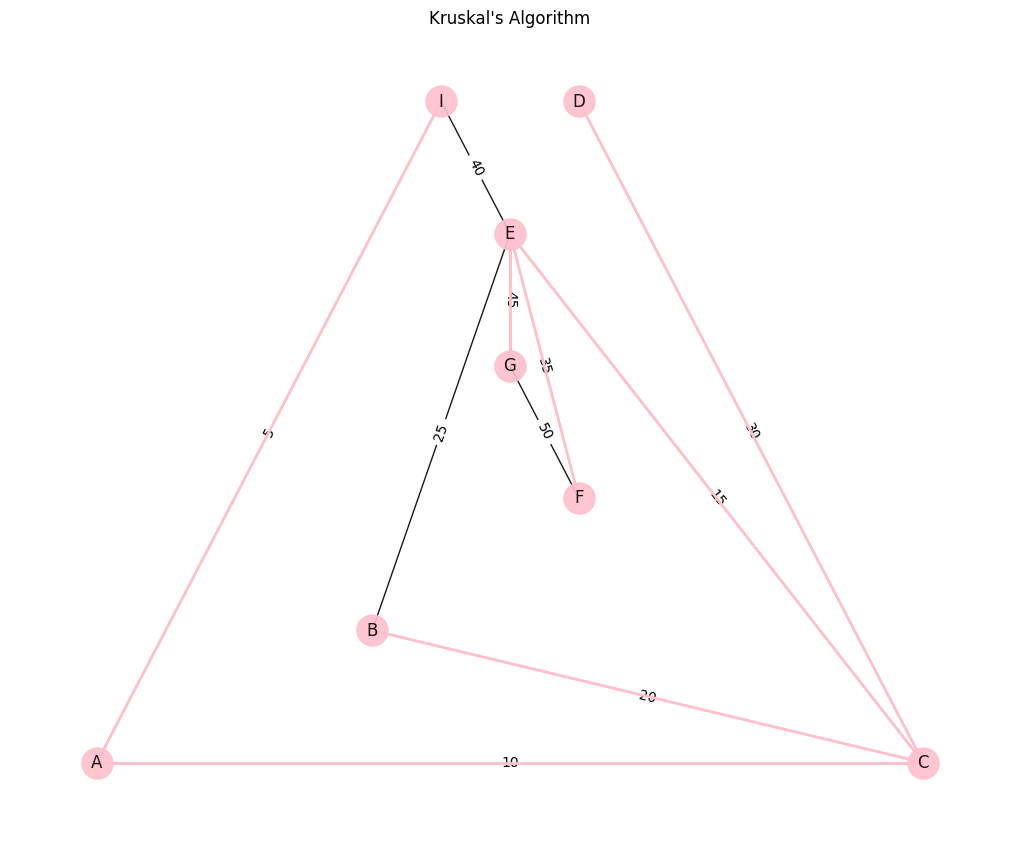

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
# create a kruskal algorithm function
def kruskal(graph):
    mst = nx.Graph()
    mst.add_nodes_from(graph.nodes)
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])
    for edge in edges:
        u, v, w = edge
        mst.add_edge(u, v, weight=w['weight'])
        if len(nx.cycle_basis(mst)) > 0:
            mst.remove_edge(u, v)
    return mst

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),("C", "D", 30), 
            ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)
kruskal_graph = kruskal(G) # Implement Kruskal's algorithm by calling the function

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
nx.draw_networkx_edges(kruskal_graph, pos=pos, edge_color='pink', width=2)
plt.title("Kruskal's Algorithm")
plt.show()

### Initialization: 
Start with an empty graph.

### Step 2:
- **Sort the edges by weight:** Arrange the edges in non-decreasing order of their weights.
- Edge List: `[("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
            ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
            ("F", "G", 50), ("G", "E", 45)]`

### Step 3:
- **Add edges to the MST:** Iterate through the sorted edges and add them to the MST if adding the edge doesn't form a cycle.

   - Add edge ("A", "I", 5) to the MST.
   - Add edge ("A", "C", 10) to the MST.
   - Add edge ("C", "E", 15) to the MST.
   - Add edge ("E", "F", 35) to the MST.
   - Add edge ("B", "E", 25) to the MST.
   - Add edge ("C", "B", 20) to the MST (skipped because it forms a cycle).
   - Add edge ("C", "D", 30) to the MST.
   - Add edge ("F", "G", 50) to the MST.
   - Add edge ("G", "E", 45) to the MST (skipped because it forms a cycle).
   - Add edge ("I", "E", 40) to the MST.

### Completion:
- **Final MST:** The final MST contains the following edges:
   `[("A", "I", 5), ("A", "C", 10), ("C", "E", 15), ("E", "F", 35), ("B", "E", 25), ("C", "D", 30), ("F", "G", 50), ("I", "E", 40)]`

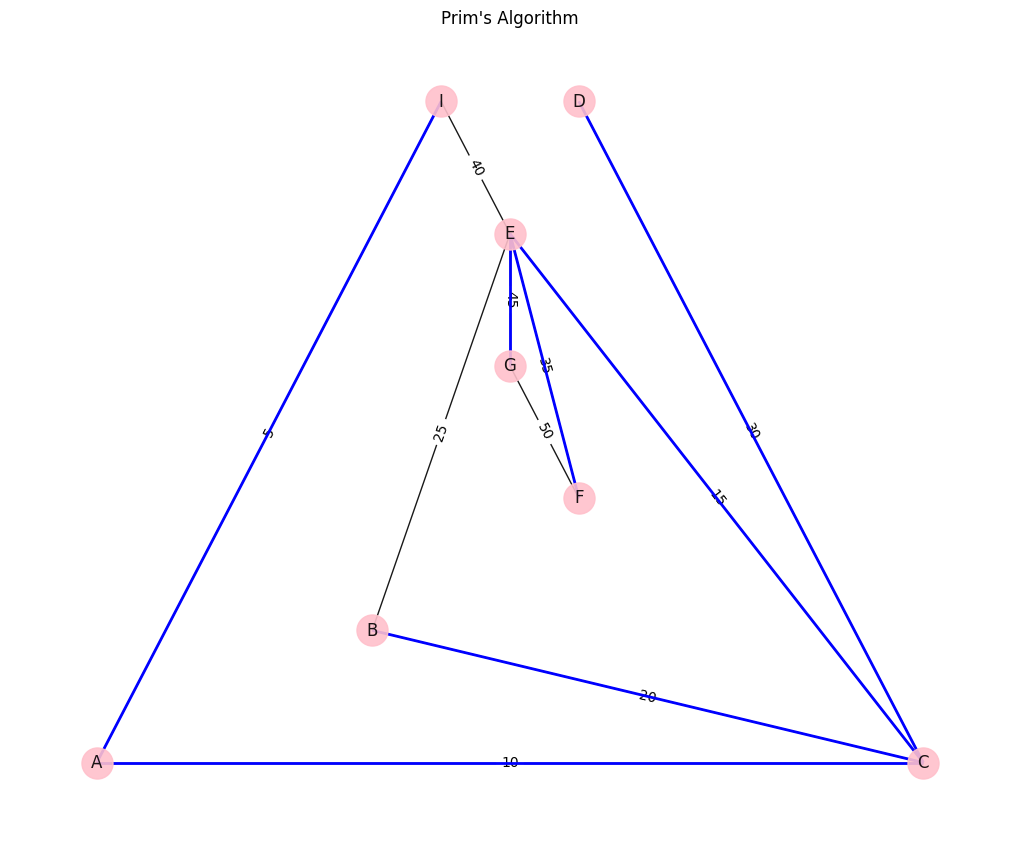

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# create a prim's algorithm function
def prim(graph):
    mst = nx.Graph()
    start_node = list(graph.nodes)[0]
    visited = {start_node}
    while len(visited) < len(graph.nodes):
        min_edge = None
        for u, v, weight in graph.edges(data='weight'):
            if (u in visited and v not in visited) or (v in visited and u not in visited):
                if min_edge is None or weight < graph[min_edge[0]][min_edge[1]]['weight']:
                    min_edge = (u, v)
        u, v = min_edge
        mst.add_edge(u, v, weight=graph[u][v]['weight'])
        visited.add(u)
        visited.add(v)
    return mst

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
            ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
            ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

prim_graph = prim(G) # call the prim function

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
nx.draw_networkx_edges(prim_graph, pos=pos, edge_color='Blue', width=2)
plt.title("Prim's Algorithm")
plt.show()

### Initialization:
- Start with an empty graph.
- Choose "A" as the starting node.
- Initialize `visited = {"A"}`.

### Iterative Process:
- Repeat the following steps until all nodes are visited:

#### Step 1:
- Find the minimum weighted edge connected to "A". In this case, it's ("A", "I") with weight 5.
- Add this edge to the `mst`: `mst.add_edge("A", "I", weight=5)`.
- Update `visited` to include "I": `visited = {"A", "I"}`.

#### Step 2:
- Find the next minimum weighted edge connected to either "A" or "I" and one unvisited node. This could be ("A", "C") with weight 10 or ("I", "E") with weight 40.
- Since we choose the edge with the smallest weight, we add ("A", "C") to the `mst`.
- Update `visited` to include "C": `visited = {"A", "I", "C"}`.

#### Step 3:
- Find the next minimum weighted edge connected to any of the visited nodes and an unvisited node. This could be ("C", "E") with weight 15.
- Add this edge to the `mst`: `mst.add_edge("C", "E", weight=15)`.
- Update `visited` to include "E": `visited = {"A", "I", "C", "E"}`.

#### Step 4:
- Find the next minimum weighted edge connected to any of the visited nodes and an unvisited node. This could be ("E", "F") with weight 35.
- Add this edge to the `mst`: `mst.add_edge("E", "F", weight=35)`.
- Update `visited` to include "F": `visited = {"A", "I", "C", "E", "F"}`.

#### Step 5:
- Find the next minimum weighted edge connected to any of the visited nodes and an unvisited node. This could be ("F", "G") with weight 50.
- Add this edge to the `mst`: `mst.add_edge("F", "G", weight=50)`.
- Update `visited` to include "G": `visited = {"A", "I", "C", "E", "F", "G"}`.

### Completion:
- Since all nodes are visited, the algorithm terminates, and we have the minimum spanning tree `mst`.


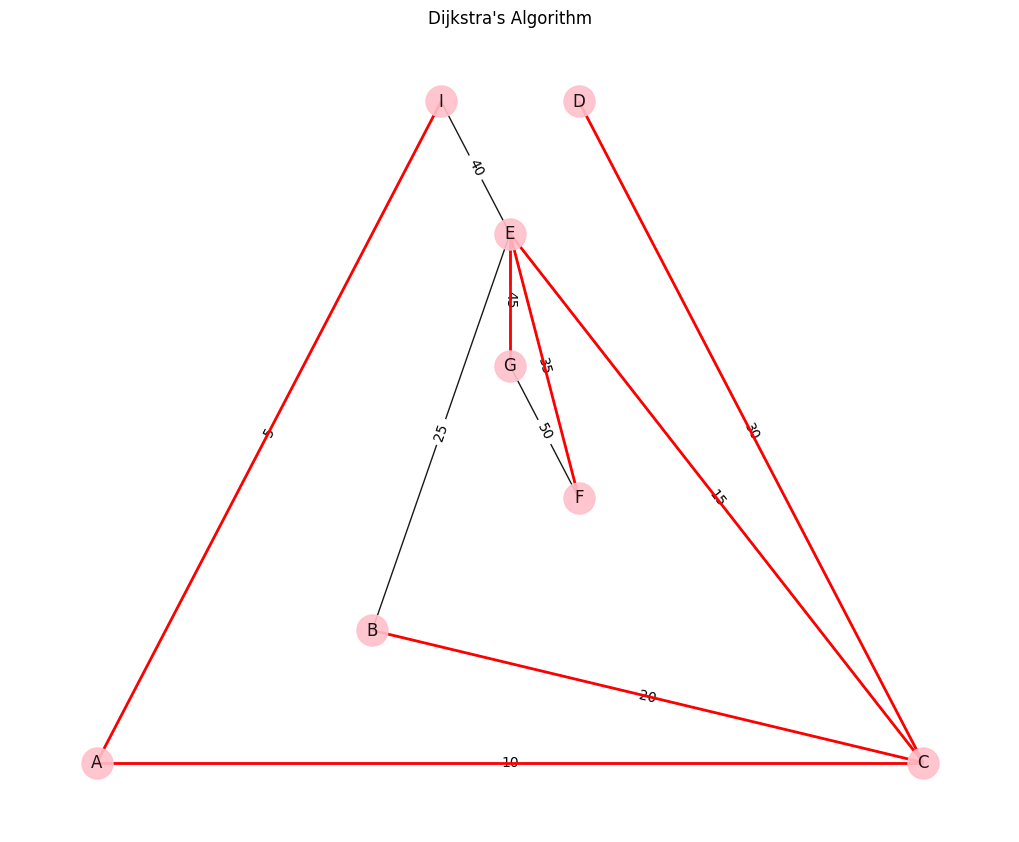

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

def dijkstra(graph, start):
    # Initialize distances with infinity for all nodes except the start node
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0

    # Initialize priority queue with start node
    pq = [(0, start)]

    while pq:
        # Pop the node with the smallest distance from the priority queue
        distance, current_node = heapq.heappop(pq)

        # Relax edges from the current node
        for neighbor, weight in graph[current_node].items():
            distance_to_neighbor = distance + weight['weight']
            if distance_to_neighbor < distances[neighbor]:
                distances[neighbor] = distance_to_neighbor
                heapq.heappush(pq, (distance_to_neighbor, neighbor))

    return distances

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
            ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
            ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

shortest_paths = dijkstra(G, 'A')# Call the dijkstra algorithm function

# Create a new graph for the minimum spanning tree
mst = nx.Graph()
for node, distance in shortest_paths.items():
    if node != 'A':
        path = nx.shortest_path(G, source='A', target=node)
        for i in range(len(path) - 1):
            mst.add_edge(path[i], path[i+1], weight=G[path[i]][path[i+1]]['weight'])

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
nx.draw_networkx_edges(mst, pos=pos, edge_color='red', width=2)
plt.title("Dijkstra's Algorithm")
plt.show()



### **Initialization**: 
   - Start at node "A". Set its distance to 0 and distances to all other nodes to infinity.
   - Set up a priority queue (heap) containing tuples of (distance, node). Initially, it contains only (0, "A").
   
### **Main Loop**:
   - While the priority queue is not empty:
     - Pop the node with the smallest distance from the priority queue. Initially, this will be node "A".
     - For each neighbor of the current node, calculate the distance to that neighbor through the current node. If this distance is shorter than the previously recorded distance to the neighbor, update the distance and add the neighbor to the priority queue.

### **Step 1**: Initialization
- Start at node "A". Set its distance to 0 and distances to all other nodes to infinity.
- The priority queue initially contains (0, "A").

### **Step 2**: Main Loop
- Pop node "A" from the priority queue.
- Check its neighbors:
  - "C": The distance from "A" to "C" is 10. Update the distance to "C" in the distances dictionary. The priority queue now contains (10, "C").
  - "I": The distance from "A" to "I" is 5. Update the distance to "I" in the distances dictionary. The priority queue now contains (5, "I").

### **Step 3**: Continue the loop
- Pop node "I" from the priority queue.
- Check its neighbors:
  - "A": Already visited.
  - "E": The distance from "I" to "E" is 40. Update the distance to "E" in the distances dictionary. The priority queue now contains (45, "E").

... (continue the steps until the loop ends)

After the algorithm completes, the distances dictionary will contain the shortest distances from node "A" to all other nodes:

{
"A": 0,
"B": 30,
"C": 10,
"D": 40,
"E": 25,
"F": 60,
"G": 70,
"I": 5
}